In [1]:
import data_prep

#basics
import numpy as np
import pandas as pd

#viz
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 



1. 导入数据，查看数据结构

In [2]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [4]:
df = data_prep.get_fund_data('fund_map_percentage.csv')
df.head()

,fund_code,A,B,C,D,E,F,G,H,I,...,K,L,M,N,O,P,Q,R,S,X
0,309,0.00,0.00,36.64,0.00,0.00,0.01,5.68,0.0,14.94,...,0.00,0.00,6.75,0.02,0.0,0.00,0.00,0.00,0.0,0.0
1,82,0.55,0.92,51.10,1.28,0.24,0.69,2.32,0.0,6.08,...,2.65,1.07,0.91,0.58,0.0,0.53,1.51,0.56,0.0,0.0
2,326,2.08,0.54,55.59,0.00,0.00,6.25,3.13,0.0,6.50,...,4.51,2.96,2.14,1.51,0.0,0.00,0.00,0.00,0.0,0.0
3,409,0.00,0.00,91.19,0.00,0.00,0.00,0.00,0.0,1.54,...,0.00,0.61,0.03,0.01,0.0,0.00,0.00,0.00,0.0,0.0
4,411,0.27,2.34,49.69,2.49,2.05,0.35,0.24,0.0,1.05,...,1.39,2.61,1.53,0.00,0.0,0.00,2.17,0.00,0.0,0.0


2. 查看每类数据分布

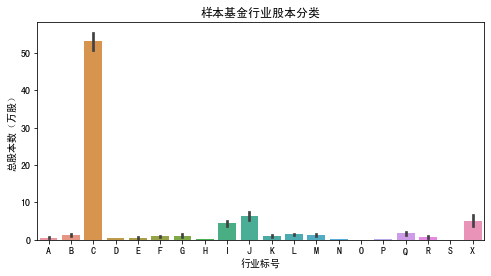

In [5]:
# 排除基金标号列
df1 = df.iloc[:, 1:]
# df_sum = df1.apply(sum, axis=0)
# df_sum

#
plt.figure(figsize=(8,4))
ax= sns.barplot(data=df1)
plt.title("样本基金行业股本分类")
plt.ylabel('总股本数（万股）')
plt.xlabel('行业标号')
plt.show()

1. 查看数据结构

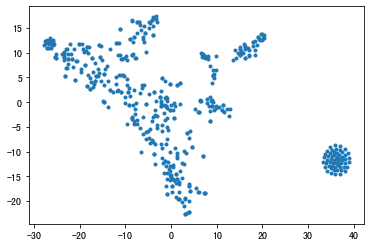

,0,1
0,1.842401,-18.227190
1,-0.241456,-12.814519
2,0.589922,-0.161551
3,-25.827156,12.507856
4,-0.184273,-15.785040
...,...,...
483,-21.326601,10.786511
484,-0.209936,-13.942863
485,-0.757142,-12.097940
486,-13.363256,2.433559


In [6]:
# tsne=TSNE(n_components=3)
# tsne.fit_transform(df1)  #进行数据降维,降成两维
# tsne=pd.DataFrame(tsne.embedding_,index=df1.index) #转换数据格式
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter(tsne[0],tsne[1],tsne[2])
# plt.show()
# tsne

tsne=TSNE()
tsne.fit_transform(df1)  #进行数据降维,降成两维
tsne=pd.DataFrame(tsne.embedding_,index=df1.index) #转换数据格式
fig = plt.plot(tsne[0],tsne[1],'.')
plt.show()
tsne

F:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


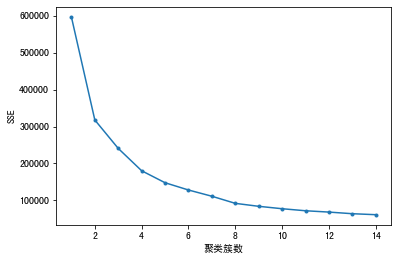

In [7]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(df1)
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()),'.-')
plt.xlabel("聚类簇数")
plt.ylabel("SSE")
plt.show()

In [8]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 6, init='k-means++')
kmeans.fit(df1)
pred = kmeans.predict(df1)

In [9]:
frame = pd.DataFrame(tsne)
frame['cluster'] = pred
frame['cluster'].value_counts()

4    161
0    155
2     73
1     58
3     35
5      6
Name: cluster, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'view_init'

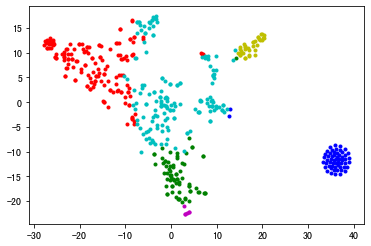

In [10]:
# fig = plt.figure()
# ax = Axes3D(fig)
# d=frame.loc[frame.cluster==0,:]
# ax.scatter(d[0],d[1],d[2],'r.')
# d=frame.loc[frame.cluster==1,:]
# ax.scatter(d[0],d[1],d[2],'b.')
# d=frame.loc[frame.cluster==2,:]
# ax.scatter(d[0],d[1],d[2],'g.')
# d=frame.loc[frame.cluster==3,:]
# ax.scatter(d[0],d[1],d[2],'y.')
# d=frame.loc[frame.cluster==4,:]
# ax.scatter(d[0],d[1],d[2],'c.')
# d=frame.loc[frame.cluster==5,:]
# ax.scatter(d[0],d[1],d[2],'m.')
# # d=tsne.loc[frame.cluster==6,:]
# # plt.plot(d[0],d[1],'tan.')

# ax.view_init(90, -150)
# plt.show()

fig = plt.figure()
d=frame.loc[frame.cluster==0,:]
plt.plot(d[0],d[1],'r.')
d=frame.loc[frame.cluster==1,:]
plt.plot(d[0],d[1],'b.')
d=frame.loc[frame.cluster==2,:]
plt.plot(d[0],d[1],'g.')
d=frame.loc[frame.cluster==3,:]
plt.plot(d[0],d[1],'y.')
d=frame.loc[frame.cluster==4,:]
plt.plot(d[0],d[1],'c.')
d=frame.loc[frame.cluster==5,:]
plt.plot(d[0],d[1],'m.')
# d=tsne.loc[frame.cluster==6,:]
# plt.plot(d[0],d[1],'tan.')

# ax.view_init(90, -150)
plt.show()